In [33]:
#pip install keras

In [31]:
#pip install tensorflow

Import the libraries

In [1]:

import numpy as np
import pandas as pd
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Prepare the dataset from Yahoo fianance

In [4]:
df = web.DataReader('BTC-USD', data_source='yahoo', start = '2018-01-01', end = '2022-08-11')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,14112.200195,13154.700195,14112.200195,13657.200195,10291200000,13657.200195
2018-01-02,15444.599609,13163.599609,13625.000000,14982.099609,16846600192,14982.099609
2018-01-03,15572.799805,14844.500000,14978.200195,15201.000000,16871900160,15201.000000
2018-01-04,15739.700195,14522.200195,15270.700195,15599.200195,21783199744,15599.200195
2018-01-05,17705.199219,15202.799805,15477.200195,17429.500000,23840899072,17429.500000


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-07,23359.009766,22894.556641,22963.505859,23175.890625,15886817043,23175.890625
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,28575544847,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,23555719219,23164.318359
2022-08-10,24127.414062,22771.519531,23162.898438,23947.642578,32837431722,23947.642578
2022-08-11,24669.126953,23956.478516,23984.750000,24423.675781,38728036352,24423.675781


In [6]:
from keras.engine import training
data = df.filter(['Close'])
dataset= data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1348

Normalization
This will take to our data is to normalize its values. The goal of normalization is to change the values of numeric columns in the data set to a common scale, without distorting differences in the ranges of values.

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.16198395],
       [0.18257929],
       [0.18598206],
       ...,
       [0.3097705 ],
       [0.32194714],
       [0.329347  ]])

In [8]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.16198395, 0.18257929, 0.18598206, 0.19217201, 0.22062372,
       0.22213934, 0.20582659, 0.18550172, 0.17656812, 0.1824425 ,
       0.15807598, 0.16701114, 0.17291197, 0.1637685 , 0.16451154,
       0.12830297, 0.12360997, 0.12806047, 0.13012016, 0.15020097,
       0.13000667, 0.11961186, 0.11863253, 0.12626504, 0.12471056,
       0.12334262, 0.12752884, 0.13290112, 0.12528572, 0.10678581,
       0.10857035, 0.09223958, 0.0869576 , 0.09230751, 0.0783498 ,
       0.05780358, 0.0702197 , 0.0681569 , 0.07817228, 0.08549997,
       0.08371107, 0.0760641 , 0.08844711, 0.08334435, 0.0972775 ,
       0.10772006, 0.10876934, 0.12243013, 0.11371103, 0.12418047,
       0.12695368, 0.11586555, 0.10521112, 0.10981394, 0.1022276 ,
       0.09992169, 0.11083369, 0.11641272, 0.11131869, 0.11991653])]
[0.12202130528365762]

[array([0.16198395, 0.18257929, 0.18598206, 0.19217201, 0.22062372,
       0.22213934, 0.20582659, 0.18550172, 0.17656812, 0.1824425 ,
       0.15807598, 0.16701114, 0.17

In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train =np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1288, 60, 1)

LSTM neural network (deep learning)


In [11]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

Compile the model

In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1288/1288 [==============================] - 24s 17ms/step - loss: 0.0022


In [14]:
test_data = scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [15]:
x_test = np.array(x_test)

In [16]:
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [17]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


11/11 [==============================] - 1s 9ms/step


Root mean square error calculation

In [18]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

286.84730747767856

Predictions

C:\Users\Saketh\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


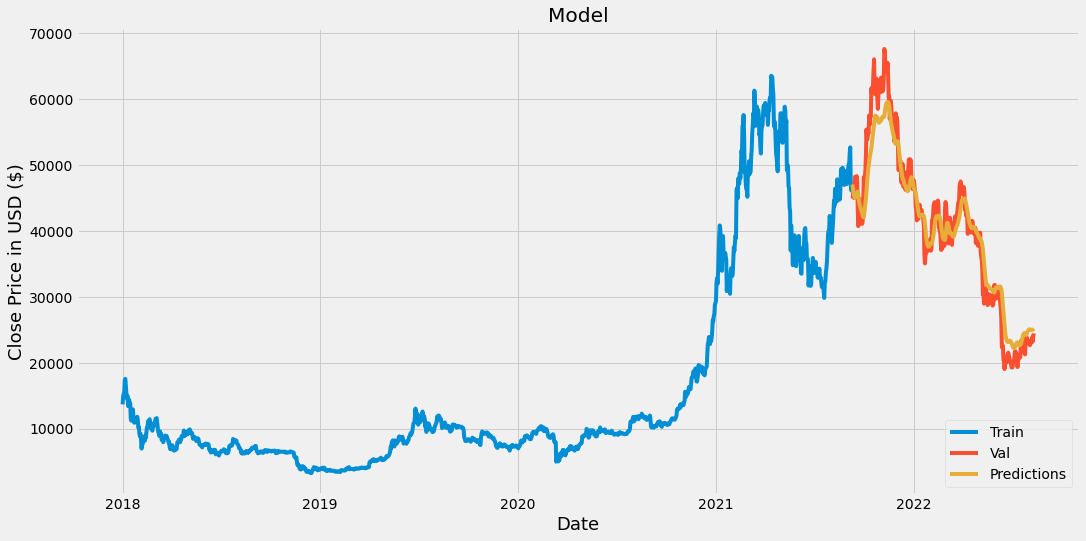

In [19]:
train= data[:training_data_len]
valid= data[training_data_len:]
valid['Predictions']= predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price in USD ($)', fontsize =18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
valid

,Close,Predictions
Date,,
2021-09-10,44883.910156,47011.523438
2021-09-11,45201.457031,46366.660156
2021-09-12,46063.269531,45783.867188
2021-09-13,44963.074219,45396.054688
2021-09-14,47092.492188,45034.894531
...,...,...
2022-08-07,23175.890625,24923.619141
2022-08-08,23809.486328,24928.136719
2022-08-09,23164.318359,25009.333984


In [21]:
btc_quote = web.DataReader('BTC-USD',data_source='yahoo', start = '2018-01-01', end = '2022-08-09')
new_df= btc_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 32ms/step
[[25156.385]]


In [22]:
#print(type(X_test.dim))

In [36]:
#X_test

In [43]:
btc_quote2= web.DataReader('BTC-USD', data_source='yahoo', start = '2022-08-11', end = '2022-08-11')
print(btc_quote2['Close'])

Date
2022-08-11    24490.841797
Name: Close, dtype: float64


Save the model

In [28]:
model.save("model.h5")
print("Saved new model to disk")

Saved new model to disk


Load the model

In [29]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model("model.h5")
loaded_model.build()
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


Conclusion: 

RNNs and LSTM are excellent technologies and have great architectures that can be used to analyze and predict time-series information. The focus of the article was to implement a simple model to predict the bitcoin price...

In [30]:
pred_price = model.predict(X_test)
print(X_test)

1/1 [==============================] - 0s 26ms/step
[[[0.36570593]
  [0.29924774]
  [0.29488593]
  [0.30057606]
  [0.26651439]
  [0.26791082]
  [0.24531112]
  [0.26918221]
  [0.26990141]
  [0.27162782]
  [0.26038008]
  [0.27746148]
  [0.27972759]
  [0.28393529]
  [0.27655083]
  [0.27201459]
  [0.26494412]
  [0.26219873]
  [0.25723531]
  [0.24922414]
  [0.2488027 ]
  [0.24965487]
  [0.26417663]
  [0.26353701]
  [0.2691041 ]
  [0.28603773]
  [0.28749163]
  [0.28533229]
  [0.27395724]
  [0.26012401]
  [0.25007206]
  [0.26387836]
  [0.26944101]
  [0.27358228]
  [0.27908497]
  [0.27269647]
  [0.29922133]
  [0.31326988]
  [0.31081844]
  [0.30977532]
  [0.30278559]
  [0.29890715]
  [0.30114072]
  [0.28174912]
  [0.27985347]
  [0.30613659]
  [0.32033427]
  [0.31972408]
  [0.31741682]
  [0.31245319]
  [0.31210037]
  [0.30687603]
  [0.30483019]
  [0.30147949]
  [0.31171354]
  [0.30661429]
  [0.30995039]
  [0.31979952]
  [0.3097705 ]
  [0.32194714]]]
